<a href="https://colab.research.google.com/github/Pillalamarrivyshnavi/2216155_AIML_Bootcamp_2023/blob/main/LR_backend_GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#creating a EMpty datframe using pandas
# import pandas as pd  
import pandas as pd  
  
# Calling DataFrame constructor  
df = pd.DataFrame()  
  
print(df) 

Empty DataFrame
Columns: []
Index: []


In [ ]:
data=[0.2,0.4,0.6,0.8]
      
df=pd.DataFrame(data,columns=['Bacteria_size'])

In [ ]:
df

,Bacteria_size
0,0.2
1,0.4
2,0.6
3,0.8


In [ ]:
df['Max_growth']=[3.4,3.8,4.2,4.6]

In [ ]:
df

,Bacteria_size,Max_growth
0,0.2,3.4
1,0.4,3.8
2,0.6,4.2
3,0.8,4.6


In [ ]:
#splitting the data
x_train=df.iloc[:3,:-1]
y_train=df.iloc[:3,-1:]
x_test=df.iloc[3:,:-1]
y_test=df.iloc[3:,-1:]

In [ ]:
x_train


,Bacteria_size
0,0.2
1,0.4
2,0.6


In [ ]:
y_train

,Max_growth
0,3.4
1,3.8
2,4.2


In [ ]:
x_test

,Bacteria_size
3,0.8


In [ ]:
y_test

,Max_growth
3,4.6


In [ ]:
'''import sklearn-linear regression
model=linear regression
model.fit(x_train,y_train)
'''

In [ ]:
import sympy as sym

In [ ]:
#step 1:Initialize the model parameters
mi=+1
ci=-1
n=0.01#learning rate-small
epochs=120
iter=1 #iteration 1
ns=len(x_train)
print(ns)

#step 2-start the iteration
for iter in range(1,epochs+1):
  print("ITERATION:{}".format(iter))
  print("++++++++++++++++++++++++++++++++++++++++++=")
  #step 3-track/feed samples
  for sample in range(0,ns):
    xa=x_train['Bacteria_size'][sample]
    ya=y_train['Max_growth'][sample]
    print("------>Sample: {}".format(sample+1)+"x={}".format(xa)+"y={}".format(ya))
    #step 4-Calculate Gradient (to know how error rate is being affected by m,c)
    m=sym.Symbol('m')
    c=sym.Symbol('c')
    x=sym.Symbol('x')
    y=sym.Symbol('y')
    E=(0.5)*(y-m*x-c)**2  #Error function
    #so as to substitute the values into equation,we need to declare thevars as symbo-explicitly -to tell the python control these are symbols
    
    deltaE_m=sym.diff(E,m)
   # print(deltaE_m)
    deltaE_c=sym.diff(E,c)
    #print(deltaE_c)

    #substitute the values in deltaE_m  
    deltaE_m=deltaE_m.subs(m,mi)
    deltaE_m=deltaE_m.subs(c,ci)
    deltaE_m=deltaE_m.subs(x,xa)
    deltaE_m=deltaE_m.subs(y,ya)

    #substitute the values in  deltaE_c
    deltaE_c=deltaE_c.subs(m,mi)
    deltaE_c=deltaE_c.subs(c,ci)
    deltaE_c=deltaE_c.subs(x,xa)
    deltaE_c=deltaE_c.subs(y,ya)
    
    #step-5:Calculate the step length - change
    del_m= -n*deltaE_m
    del_c= -n*deltaE_c

    #step-6:update the model paras
    mi=mi+del_m
    ci=ci+del_c
    print("m:{}  ".format(mi)+"c:{}".format(ci))
  
print("------------------------------------------------------")
print("Optimal Parameters:")
print("m={} ".format(round(mi,2)))
print("c={}".format(round(ci,2)))

3
ITERATION:1
++++++++++++++++++++++++++++++++++++++++++=
------>Sample: 1x=0.2y=3.4
m:1.00840000000000  c:-0.958000000000000
------>Sample: 2x=0.4y=3.8
m:1.02581856000000  c:-0.914453600000000
------>Sample: 3x=0.6y=4.2
m:1.05281233478400  c:-0.869463975360000
ITERATION:2
++++++++++++++++++++++++++++++++++++++++++=
------>Sample: 1x=0.2y=3.4
m:1.06093013780081  c:-0.828874960275968
------>Sample: 2x=0.4y=3.8
m:1.07774814942143  c:-0.786829931224411
------>Sample: 3x=0.6y=4.2
m:1.10378923567086  c:-0.743428120808696
ITERATION:3
++++++++++++++++++++++++++++++++++++++++++=
------>Sample: 1x=0.2y=3.4
m:1.11163457621821  c:-0.704201418071951
------>Sample: 2x=0.4y=3.8
m:1.12787276656855  c:-0.663605942196104
------>Sample: 3x=0.6y=4.2
m:1.15299406026208  c:-0.621737119373554
ITERATION:4
++++++++++++++++++++++++++++++++++++++++++=
------>Sample: 1x=0.2y=3.4
m:1.16057633687672  c:-0.583825736300343
------>Sample: 2x=0.4y=3.8
m:1.17625471768292  c:-0.544629784284846
------>Sample: 3x=0.6y=4.2

In [ ]:
#best fit line
y=(1.10)*x+(-0.74)

In [ ]:
y_train

,Max_growth
0,3.4
1,3.8
2,4.2


In [ ]:
y_train_pred=[]
for i in range(0,len(x_train)):
  y_cal=mi*x_train['Bacteria_size'][i]+ci
  y_train_pred.append(y_cal)

print(y_train_pred)

[3.23454946501448, 3.72957804974374, 4.22460663447300]


In [ ]:
y_train_list=list(y_train['Max_growth'])
y_train_list

[3.4, 3.8, 4.2]

In [ ]:
x_train_list=list(x_train['Bacteria_size'])
x_train_list

[0.2, 0.4, 0.6]

Text(0, 0.5, 'y values-Max Growth')

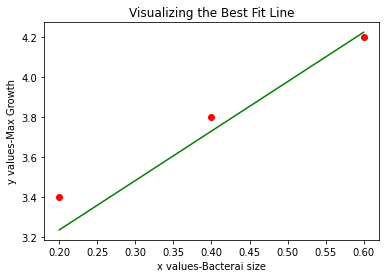

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_train_list,y_train_list,color='red')
plt.plot(x_train_list,y_train_pred,color='green')

#Add labels
plt.title("Visualizing the Best Fit Line")
plt.xlabel("x values-Bacterai size")
plt.ylabel("y values-Max Growth")